In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sqlite3 as db

pd.pandas.set_option('display.max_columns',None)

In [2]:
# https://towardsdatascience.com/an-easy-beginners-guide-to-sqlite-in-python-and-pandas-fbf1f38f6800
# so the line of code above will connect to a file called my_database.db IF IT EXISTS in the folder. If it does not exist, a file called my_database.db will automatically be created on your computer 

conn = db.connect('../data/news_popularity.db')

# In order to interact with our database, we now have to create a cursor. This is what we will use to issue commands that will allow us to query or modify our database.
# c = conn.cursor()
# good practise to close if not using
# c.close()
# conn.close()

In [3]:
# simplest way
# df = pd.read_sql_query('select * from sqlite_master', conn)
# df

# cursor must select the connected database 
cursor = conn.cursor()
cursor.execute("SELECT name from sqlite_master WHERE type='table';")

print(cursor.fetchall())
cursor.close()

[('articles',), ('description',), ('keywords',)]


In [4]:
df_articles = pd.read_sql_query('select * from articles',conn)
df_description = pd.read_sql_query('select * from description', conn)
df_keywords = pd.read_sql_query('select * from keywords',conn)

print('shape of articles',df_articles.shape)
print('shape of description', df_description.shape)
print('shape of keywords', df_keywords.shape)

shape of articles (39644, 5)
shape of description (39644, 16)
shape of keywords (35680, 11)


##### keywords has lesser rows

In [5]:
df_articles.head()

,ID,url,timedelta,weekday,shares
0,0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,monday,593
1,1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,monday,711
2,2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,monday,1500
3,3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,monday,1200
4,4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,monday,505





#### observations for articles
39644 row with 5 columns


to checK:
is url unique through all tables?
#### unique = url and id




In [6]:
df_articles['url'].is_unique

True

#### url column in df_articles in unique, therefore no duplicates url

In [7]:
df_description.head()

,ID,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,n_comments,average_token_length,data_channel,self_reference_min_shares,self_reference_max_shares,self_reference_avg_shares
0,0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,0.0,4.680365,entertainment,496.0,496.0,496.000000
1,1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,NaN,28.0,4.913725,business,0.0,0.0,0.000000
2,2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,15.0,4.393365,business,918.0,918.0,918.000000
3,3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,72.0,4.404896,entertainment,0.0,0.0,0.000000
4,4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,NaN,20.0,4.682836,technology,545.0,16000.0,3151.157895


### nothing much in description, deeper of what was in article

In [8]:
df_keywords.head()

,ID,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg
0,0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df_keywords.tail()

,ID,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg
35675,39638,6.0,-1.0,459.0,91.000,0.0,843300.0,484083.333333,0.000000,4301.332394,2665.713159
35676,39639,8.0,-1.0,671.0,173.125,26900.0,843300.0,374962.500000,2514.742857,4004.342857,3031.115764
35677,39640,7.0,-1.0,616.0,184.000,6500.0,843300.0,192985.714286,1664.267857,5470.168651,3411.660830
35678,39642,5.0,-1.0,0.0,-1.000,0.0,843300.0,254600.000000,0.000000,3384.316871,1777.895883
35679,39643,4.0,-1.0,97.0,23.500,205600.0,843300.0,366200.000000,3035.080555,3613.512953,3296.909481


##### nothing much in keywords too, except why is some kw_min_min negative?
### keywords also has less rows then the other two

### ID is unqiue, so is URL, combine by ID as they are universal across the tables

In [10]:
df_articles['ID'].is_unique

True

In [11]:
df_description['ID'].is_unique

True

In [12]:
df_keywords['ID'].is_unique

True

### data here will suggest that keywords have lesser rows and can be populated since URL and ID is unique

### SQL joins
https://www.analyticsvidhya.com/blog/2021/06/join-the-dataframes-like-sql-tables-in-python-using-pandas/


(INNER) JOIN: Returns only those records that have matching values in both DataFrames

LEFT (OUTER) JOIN: Returns all the records from the left DataFrame and the matched records from the right DataFrame

RIGHT (OUTER) JOIN: Returns all the records from the right DataFrame, and the matched records from the left DataFrame

FULL (OUTER) JOIN: Returns all the records when there is a match in either left or right DataFrame


https://www.analyticsvidhya.com/blog/2021/06/15-pandas-functions-to-replicate-basic-sql-queries-in-python/

In [13]:
# https://pandas.pydata.org/docs/user_guide/merging.html

# Something to note is that whilst the default for merge() is "inner", the default for join() is left. 
# So if you are working with index joins be mindful. 

df_premerge = pd.merge(df_keywords, df_description,  on="ID",how="outer")
df_merged = pd.merge(df_premerge, df_articles, on="ID",how="outer")

print('shape of merged is: ',df_merged.shape)

df_merged.head()

shape of merged is:  (39644, 30)


,ID,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,n_comments,average_token_length,data_channel,self_reference_min_shares,self_reference_max_shares,self_reference_avg_shares,url,timedelta,weekday,shares
0,0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,0.0,4.680365,entertainment,496.0,496.0,496.000000,http://mashable.com/2013/01/07/amazon-instant-...,731.0,monday,593
1,1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,NaN,28.0,4.913725,business,0.0,0.0,0.000000,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,monday,711
2,2,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,15.0,4.393365,business,918.0,918.0,918.000000,http://mashable.com/2013/01/07/apple-40-billio...,731.0,monday,1500
3,3,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,72.0,4.404896,entertainment,0.0,0.0,0.000000,http://mashable.com/2013/01/07/astronaut-notre...,731.0,monday,1200
4,4,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,NaN,20.0,4.682836,technology,545.0,16000.0,3151.157895,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,monday,505


In [14]:
df_merged['url'].isnull().sum()

0

### confirming that there are no null URLs

In [15]:
df_merged.dtypes

ID                             int64
num_keywords                 float64
kw_min_min                   float64
kw_max_min                   float64
kw_avg_min                   float64
kw_min_max                   float64
kw_max_max                   float64
kw_avg_max                   float64
kw_min_avg                   float64
kw_max_avg                   float64
kw_avg_avg                   float64
n_tokens_title               float64
n_tokens_content             float64
n_unique_tokens              float64
n_non_stop_words             float64
n_non_stop_unique_tokens     float64
num_hrefs                    float64
num_self_hrefs               float64
num_imgs                     float64
num_videos                   float64
n_comments                   float64
average_token_length         float64
data_channel                  object
self_reference_min_shares    float64
self_reference_max_shares    float64
self_reference_avg_shares    float64
url                           object
t

### findings
data_channel is an object

In [16]:
df_merged.isnull().sum()

ID                               0
num_keywords                  3964
kw_min_min                    3964
kw_max_min                    3964
kw_avg_min                    3964
kw_min_max                    3964
kw_max_max                    3964
kw_avg_max                    3964
kw_min_avg                    3964
kw_max_avg                    3964
kw_avg_avg                    3964
n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
n_non_stop_words                 0
n_non_stop_unique_tokens         0
num_hrefs                      793
num_self_hrefs                 793
num_imgs                      1586
num_videos                   18633
n_comments                       0
average_token_length             0
data_channel                  6134
self_reference_min_shares      793
self_reference_max_shares      793
self_reference_avg_shares      793
url                              0
timedelta                        0
weekday             

#### num keyword, to kw avg avg has the same sum of null, 
#### num video has the MOST null

### added copy below other wise it only refer instead of copy entirely

In [17]:
# how to get the row of null columns
# https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-a-certain-column-is-nan
df_merge_clean = df_merged.dropna(subset=['num_keywords','kw_min_min','kw_max_min','kw_avg_min']).copy()

In [18]:
print(df_merge_clean.shape)
df_merge_clean.info()

(35680, 30)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 35680 entries, 0 to 35679
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         35680 non-null  int64  
 1   num_keywords               35680 non-null  float64
 2   kw_min_min                 35680 non-null  float64
 3   kw_max_min                 35680 non-null  float64
 4   kw_avg_min                 35680 non-null  float64
 5   kw_min_max                 35680 non-null  float64
 6   kw_max_max                 35680 non-null  float64
 7   kw_avg_max                 35680 non-null  float64
 8   kw_min_avg                 35680 non-null  float64
 9   kw_max_avg                 35680 non-null  float64
 10  kw_avg_avg                 35680 non-null  float64
 11  n_tokens_title             35680 non-null  float64
 12  n_tokens_content           35680 non-null  float64
 13  n_unique_tokens            35680 n

In [19]:
df_merge_clean['shares'].describe()

count     35680.000000
mean       3402.054961
std       11934.878541
min           4.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

In [20]:
df_merge_clean.dtypes

ID                             int64
num_keywords                 float64
kw_min_min                   float64
kw_max_min                   float64
kw_avg_min                   float64
kw_min_max                   float64
kw_max_max                   float64
kw_avg_max                   float64
kw_min_avg                   float64
kw_max_avg                   float64
kw_avg_avg                   float64
n_tokens_title               float64
n_tokens_content             float64
n_unique_tokens              float64
n_non_stop_words             float64
n_non_stop_unique_tokens     float64
num_hrefs                    float64
num_self_hrefs               float64
num_imgs                     float64
num_videos                   float64
n_comments                   float64
average_token_length         float64
data_channel                  object
self_reference_min_shares    float64
self_reference_max_shares    float64
self_reference_avg_shares    float64
url                           object
t

In [21]:
# sns.set(rc={'figure.figsize':(20,20)})
# sns.pairplot(df_merge_clean.iloc[:100])


In [22]:
# sns.set(rc={'figure.figsize':(20,20)})
# sns.heatmap(df_merge_clean.iloc[:100].corr(),annot=True,fmt='.2f',linewidths=2)

#### changing days to 1 2 3 4 5 6 7
mon - 1

tue - 2

wed - 3

thu - 4

fri - 5

sat - 6

sun - 7

In [23]:
df_merge_clean.replace(to_replace = ['monday','tuesday','wednesday','thursday','friday','saturday','sunday'], value=[1,2,3,4,5,6,7], inplace=True)

#### changing data channel to 0 1 2 3 4 5 6
0 - none

1 - entertainment

2 - business 

3 - technology

4 - lifestyle

5 - world

6 - social media

In [24]:
df_merge_clean['data_channel'].unique()

array(['entertainment', 'business', 'technology', 'lifestyle', 'world',
       None, 'social_media'], dtype=object)

In [25]:
df_merge_clean['data_channel'].replace(to_replace = [np.nan,'entertainment', 'business','technology','lifestyle','world', 'social_media'], value=[0,1,2,3,4,5,6], inplace=True)

In [26]:
df_merge_clean['data_channel'].unique()

array([1, 2, 3, 4, 5, 0, 6])

In [27]:
df_merge_clean.dtypes

ID                             int64
num_keywords                 float64
kw_min_min                   float64
kw_max_min                   float64
kw_avg_min                   float64
kw_min_max                   float64
kw_max_max                   float64
kw_avg_max                   float64
kw_min_avg                   float64
kw_max_avg                   float64
kw_avg_avg                   float64
n_tokens_title               float64
n_tokens_content             float64
n_unique_tokens              float64
n_non_stop_words             float64
n_non_stop_unique_tokens     float64
num_hrefs                    float64
num_self_hrefs               float64
num_imgs                     float64
num_videos                   float64
n_comments                   float64
average_token_length         float64
data_channel                   int64
self_reference_min_shares    float64
self_reference_max_shares    float64
self_reference_avg_shares    float64
url                           object
t

In [28]:
# sns.set(rc={'figure.figsize':(25,25)})
# sns.heatmap(df_merge_clean.iloc[:100].corr(),annot=True,fmt='.2f',linewidths=2)

In [29]:
# sns.set(rc={'figure.figsize':(20,20)})
# sns.pairplot(df_merge_clean.iloc[:100])

In [30]:
df_merge_clean.isnull().sum()

ID                               0
num_keywords                     0
kw_min_min                       0
kw_max_min                       0
kw_avg_min                       0
kw_min_max                       0
kw_max_max                       0
kw_avg_max                       0
kw_min_avg                       0
kw_max_avg                       0
kw_avg_avg                       0
n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
n_non_stop_words                 0
n_non_stop_unique_tokens         0
num_hrefs                      721
num_self_hrefs                 721
num_imgs                      1419
num_videos                   16755
n_comments                       0
average_token_length             0
data_channel                     0
self_reference_min_shares      721
self_reference_max_shares      721
self_reference_avg_shares      721
url                              0
timedelta                        0
weekday             

In [31]:
temp_df = df_merge_clean.dropna(how='any')
df_merge_clean.shape

(35680, 30)

In [32]:
temp_df.shape

(17831, 30)

In [33]:
short_df = temp_df.sample(n=50)
short_df.shape

(50, 30)

<AxesSubplot:>

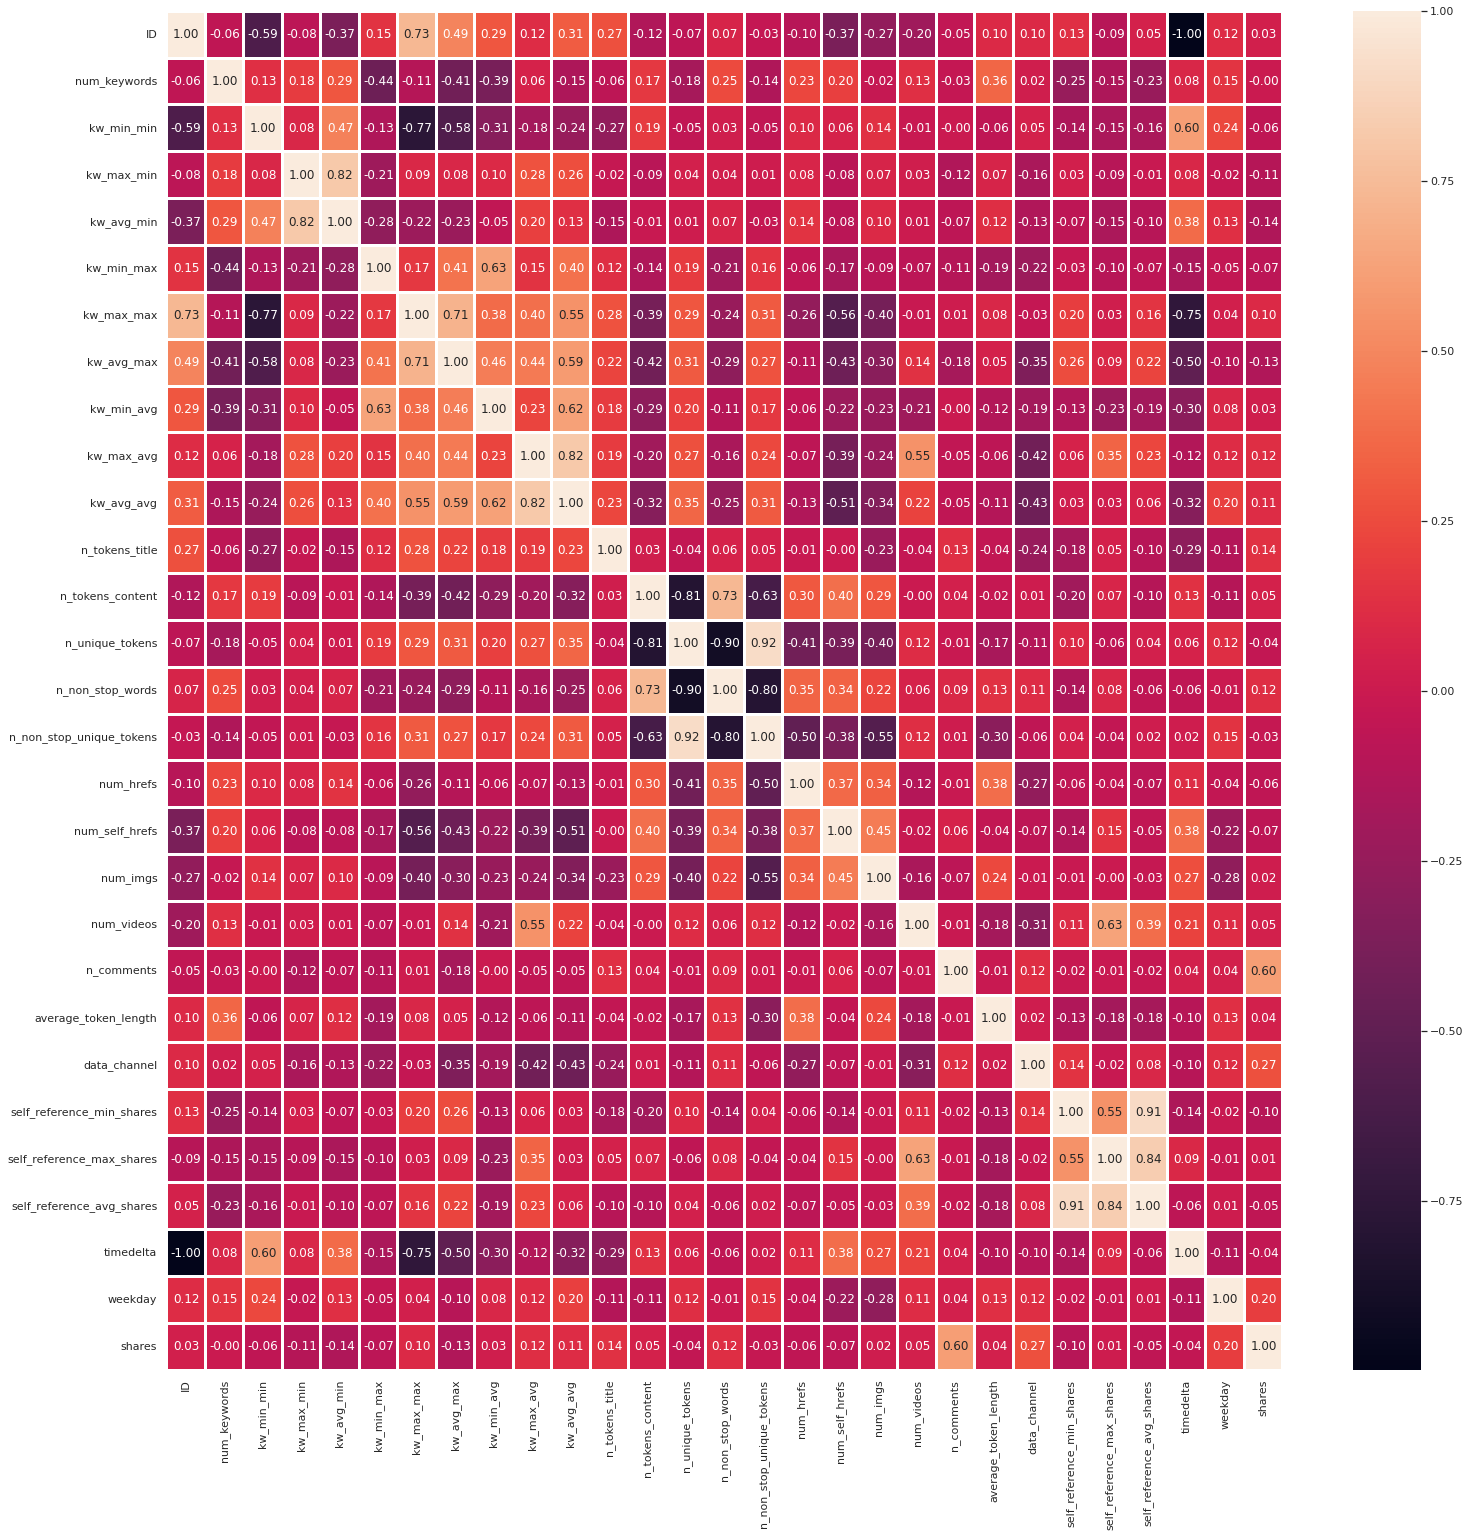

In [34]:
sns.set(rc={'figure.figsize':(25,25)})
sns.heatmap(short_df.corr(),annot=True,fmt='.2f',linewidths=2)

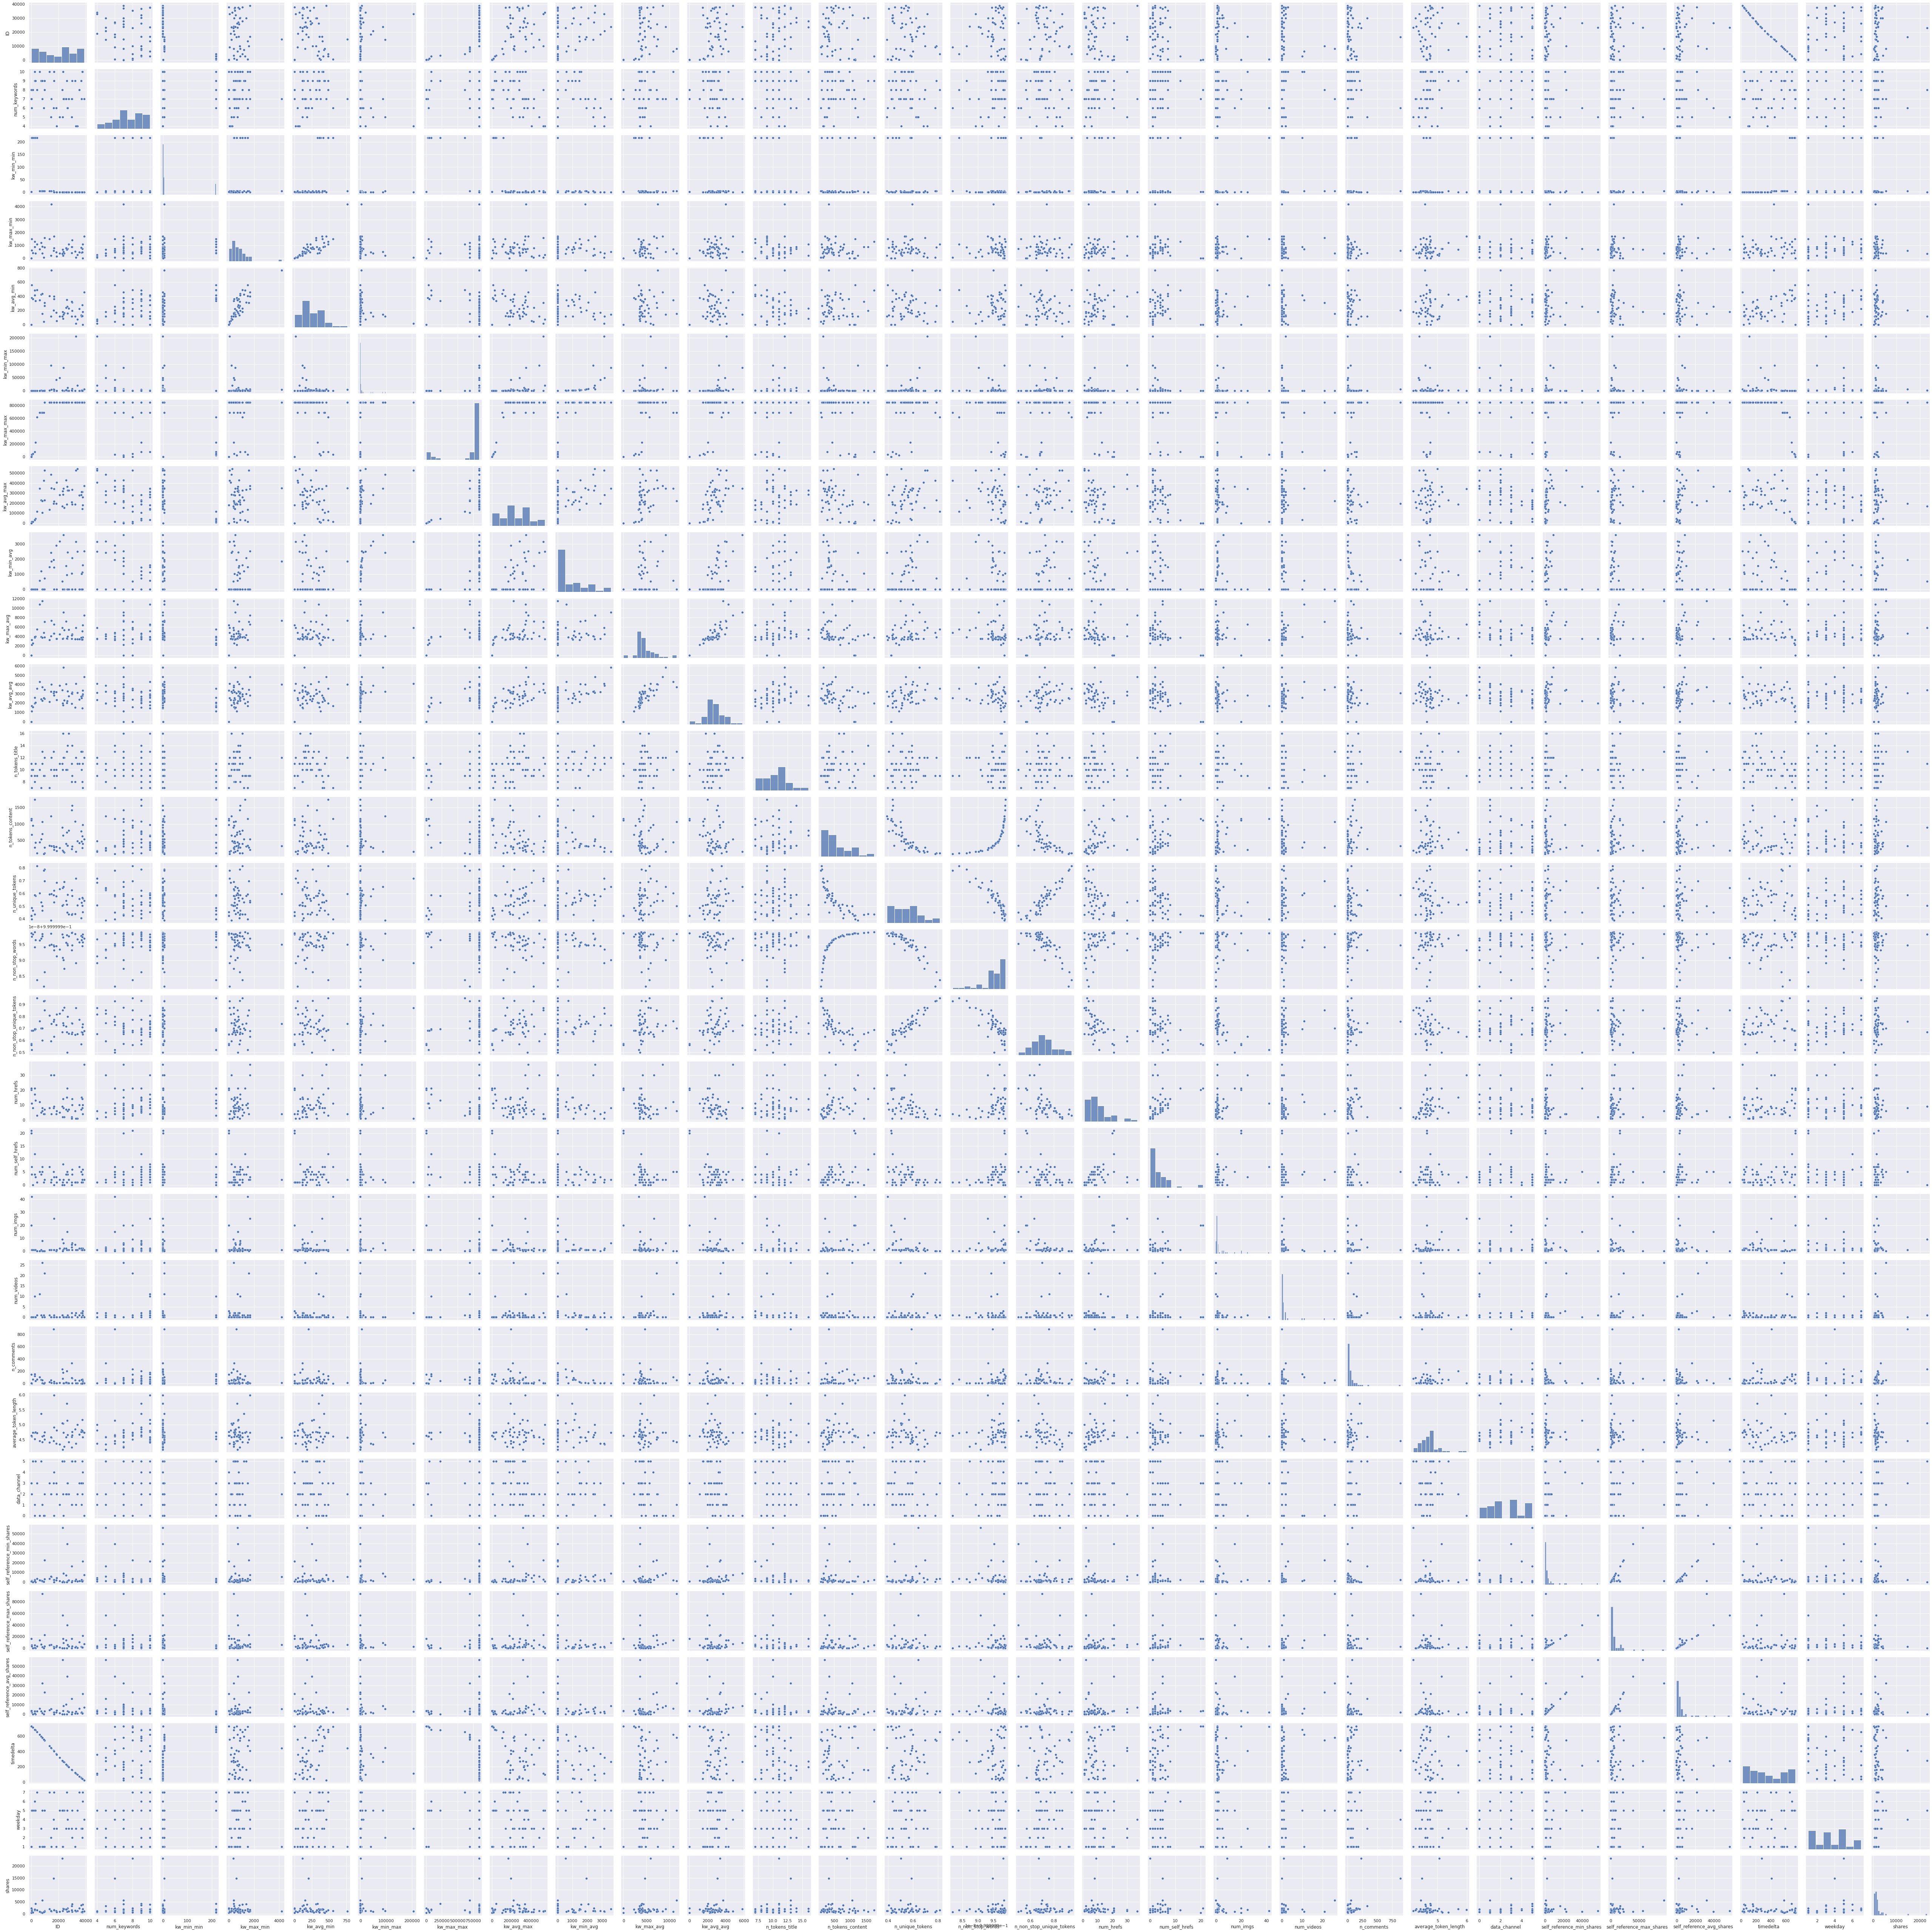

In [35]:
sns.set(rc={'figure.figsize':(20,20)})
sns.pairplot(short_df)

In [ ]:
#display unique values for variable
df_merge_clean['data_channel'].unique()

In [ ]:
df_merge_clean['data_channel'].nunique()

In [ ]:
df_merge_clean['data_channel'].isnull().sum()

In [ ]:
df_merge_clean['data_channel'].value_counts()

In [ ]:
howmany = df_merge_clean['data_channel'].value_counts().sum()
print(howmany)
df_merge_clean.shape

### interest here, world has most, lifestyle has least

In [ ]:
df_merge_clean['url'].unique()

In [ ]:
df_merge_clean['weekday'].unique()

we can see everyday of the week here

In [ ]:
# get the count of unique...
df_merge_clean['weekday'].value_counts()

### (just checking) saturday and sunday has way lesser..

In [ ]:
df_merge_clean.loc[df_merge_clean['weekday'] == 'saturday']

### so looks like under data channel, there is also None that was missed earlier.. and why kw_min_min can be negative..

In [ ]:
df_merge_clean['data_channel'].isnull().sum()

In [ ]:
df_merge_clean.loc[df_merge_clean['data_channel'] == 'none']

## SEE THE WHOLE ROW OF A PARTICULAR COLUMN (syntax below)

In [ ]:
# check all none for the data_channel column
datachannelNone = df_merge_clean[df_merge_clean['data_channel'].isnull()]
print('shape = ',datachannelNone.shape)
datachannelNone

#### is there data loss if i remove None from data_channel.. should i remove or rename as 'None', is there value in renaming

ok nvm.. remove none for now since it is quite hard to make sense that none as a data channel giving meaning
# feature engineering

### changing days to numerical

In [ ]:
# change day to numerical
daysconverted = {'monday':1 ,"tuesday":2,"wednesday":3,"thursday":4,"friday":5,"saturday":6,"sunday":7}
# df_merge_clean['weekday'] = df_merge_clean['weekday'].apply(lambda x : daysconverted[x])
# df_merge_clean['weekday']
# data.loc[data.bidder == 'parakeet2004', 'bidderrate'] = 100
# df_merge_clean.loc[df_merge_clean['weekday'] == 'monday'] = 1
# df_merge_clean.loc[df_merge_clean['weekday'] == 'tuesday'] = 2
# df_merge_clean.loc[df_merge_clean['weekday'] == 'wednesday'] = 3
# df_merge_clean.loc[df_merge_clean['weekday'] == 'thursday'] = 4
# df_merge_clean.loc[df_merge_clean['weekday'] == 'friday'] = 5
# df_merge_clean.loc[df_merge_clean['weekday'] == 'saturday'] = 6
# df_merge_clean.loc[df_merge_clean['weekday'] == 'sunday'] = 7

# def changedaytonum(df_merge_clean, day):
    

# df_new = df_merge_clean.replace(daysconverted, inplace=True)
# df_merge_clean.loc[df_merge_clean[]]
df_merge_clean.replace(to_replace = ['monday','tuesday','wednesday','thursday','friday','saturday','sunday'], value=[1,2,3,4,5,6,7], inplace=True)

# change data_chan to numerical

df_merge_clean['weekday']


# do correlation .. find relation

In [ ]:
df_merge_clean['data_channel'].isnull().sum()

In [ ]:
df_merge_clean.isnull().sum()

In [ ]:
df_merge_clean.dtypes

### check all the null empty one

In [ ]:
datachannelNone

## remove data channel None

In [ ]:
df_merge_clean.dropna(subset=['data_channel'], inplace=True)
df_merge_clean.data_channel.unique()
datachannelNone = df_merge_clean[df_merge_clean['data_channel'].isnull()]
datachannelNone
df_merge_clean.shape
tempviewer = df_merge_clean[df_merge_clean['num_videos'].isnull()]
tempviewer
df_merge_clean

check for outliets in the null columns. 

num_hrefs                      721

num_self_hrefs                 721

num_imgs                      1419

num_videos                   16755

self_reference_min_shares      721

self_reference_max_shares      721

self_reference_avg_shares      721

In [ ]:
df_merge_clean.isnull().sum()

### there is some null in num_hrefs, checking for outliers

In [ ]:
# print(df_merge_clean.dtypes)
# print(df_merge_clean.describe())


# valofcol = df_merge_clean['num_hrefs'].value_counts().values
valofcol = df_merge_clean['num_hrefs'].value_counts().values
print('highest val is ',df_merge_clean['num_hrefs'].max())

fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(x=df_merge_clean['num_hrefs'],ax=ax,data=df_merge_clean)
plt.show()

### above shows there is one outlier at 304, most of the other is at 0-50

## paused here, quick visit to the book to understand why and ref EDA

In [ ]:
# fig, ax = plt.subplots(figsize=(10,6))
# ax.scatter(x=df_merge_clean['num_hrefs'],y=df_merge_clean['url'])
# plt.show()

In [ ]:
# df2 = df_merge_clean.corr()
# fig, ax = plt.subplots(figsize=(12,12))
# # use cmap cividis for colourblind friendlyness
# sns.heatmap(df2,cmap="cividis",ax=ax)